**Veri Temizleme(data cleaning**)

*   Gürültülü Veri
*   Eksik Veri Analizi
*   Aykırı Gözlem Analizi


Veri Standardizasyonu (scale)
*   0-1 dönüşümü
*   Z-skoruna dönüşüm
*   Logaritmik dönüşüm


Veri İndirgeme
*   Gözlem Sayısının Azaltılması
*   Değişken Sayısının Azaltılması


Değişken Dönüşümleri
*   Sürekli Değişkenlerde Dönüşümler
*   Kategorik Değişkenlerde Dönüşümler


In [11]:
import seaborn as sns
df=sns.load_dataset('diamonds')
df=df.select_dtypes(include=['float64','int64'])
df=df.dropna()
df.head()

,carat,depth,table,price,x,y,z
0,0.23,61.5,55.0,326,3.95,3.98,2.43
1,0.21,59.8,61.0,326,3.89,3.84,2.31
2,0.23,56.9,65.0,327,4.05,4.07,2.31
3,0.29,62.4,58.0,334,4.20,4.23,2.63
4,0.31,63.3,58.0,335,4.34,4.35,2.75


Aykırı gözlem analizi yapacağımız değişkeni seçelim

In [12]:
df_table = df["table"]

In [13]:
df_table.head()

0    55.0
1    61.0
2    65.0
3    58.0
4    58.0
Name: table, dtype: float64

Kutu grafiği oluşturalım

<Axes: xlabel='table'>

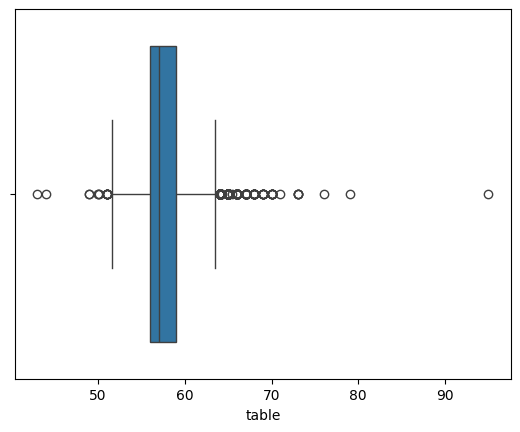

In [15]:
sns.boxplot(x=df_table)

In [16]:
Q1 = df_table.quantile(0.25)
Q3 = df_table.quantile(0.75)
IQR = Q3-Q1

In [20]:
Q1, Q3,	IQR

(56.0, 59.0, 3.0)

In [21]:
alt_sinir = Q1-1.5*IQR
ust_sinir = Q3+1.5*IQR

In [22]:
alt_sinir,ust_sinir

(51.5, 63.5)

In [24]:
((df_table < alt_sinir) | (df_table > ust_sinir))

0        False
1        False
2         True
3        False
4        False
         ...  
53935    False
53936    False
53937    False
53938    False
53939    False
Name: table, Length: 53940, dtype: bool

In [29]:
aykiri_tf = (df_table < alt_sinir)
df_table[aykiri_tf].index

Int64Index([ 1515,  3238,  3979,  4150,  5979,  7418,  8853, 11368, 22701,
            25179, 26387, 33586, 35633, 45798, 46040, 47630],
           dtype='int64')

#Aykırı değer problemini çözme

Silme

In [30]:
import pandas as pd

In [33]:
df_table = pd.DataFrame(df_table)

In [37]:
df_table.shape

(53940, 1)

In [44]:
#aykırı değerleri çıkarma
t_df=df_table[~(((df_table< alt_sinir)| (df_table>ust_sinir))).any(axis=1)]

In [45]:
t_df

,table
0,55.0
1,61.0
3,58.0
4,58.0
5,57.0
...,...
53935,57.0
53936,55.0
53937,60.0
53938,58.0


In [46]:
t_df.shape

(53335, 1)

Ortalama ile Doldurma

In [47]:
import seaborn as sns
df=sns.load_dataset('diamonds')
df=df.select_dtypes(include=['float64','int64']) #tip seçimi
df=df.dropna() #eksik değerleri dışarıda bırakma işlemi
df.head()

,carat,depth,table,price,x,y,z
0,0.23,61.5,55.0,326,3.95,3.98,2.43
1,0.21,59.8,61.0,326,3.89,3.84,2.31
2,0.23,56.9,65.0,327,4.05,4.07,2.31
3,0.29,62.4,58.0,334,4.20,4.23,2.63
4,0.31,63.3,58.0,335,4.34,4.35,2.75


In [48]:
df_table = df["table"]

In [49]:
aykiri_tf.head()

0    False
1    False
2    False
3    False
4    False
Name: table, dtype: bool

In [50]:
df_table[aykiri_tf]

1515     51.0
3238     50.1
3979     51.0
4150     51.0
5979     49.0
7418     50.0
8853     51.0
11368    43.0
22701    49.0
25179    50.0
26387    51.0
33586    51.0
35633    44.0
45798    51.0
46040    51.0
47630    51.0
Name: table, dtype: float64

In [51]:
df_table.mean()

57.45718390804598

In [52]:
df_table[aykiri_tf] = df_table.mean()

<ipython-input-52-57ba1f56a480>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_table[aykiri_tf] = df_table.mean()


In [53]:
df_table[aykiri_tf]

1515     57.457184
3238     57.457184
3979     57.457184
4150     57.457184
5979     57.457184
7418     57.457184
8853     57.457184
11368    57.457184
22701    57.457184
25179    57.457184
26387    57.457184
33586    57.457184
35633    57.457184
45798    57.457184
46040    57.457184
47630    57.457184
Name: table, dtype: float64

Baskılama Yöntemi

In [54]:
import seaborn as sns
df=sns.load_dataset('diamonds')
df=df.select_dtypes(include=['float64','int64']) #tip seçimi
df=df.dropna() #eksik değerleri dışarıda bırakma işlemi
df.head()

,carat,depth,table,price,x,y,z
0,0.23,61.5,55.0,326,3.95,3.98,2.43
1,0.21,59.8,61.0,326,3.89,3.84,2.31
2,0.23,56.9,65.0,327,4.05,4.07,2.31
3,0.29,62.4,58.0,334,4.20,4.23,2.63
4,0.31,63.3,58.0,335,4.34,4.35,2.75


In [56]:
df_table=df["table"]

In [57]:
df_table[aykiri_tf]

1515     51.0
3238     50.1
3979     51.0
4150     51.0
5979     49.0
7418     50.0
8853     51.0
11368    43.0
22701    49.0
25179    50.0
26387    51.0
33586    51.0
35633    44.0
45798    51.0
46040    51.0
47630    51.0
Name: table, dtype: float64

In [58]:
alt_sinir

51.5

In [59]:
df_table[aykiri_tf] = alt_sinir

<ipython-input-59-e2f0da25fd88>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_table[aykiri_tf] = alt_sinir


# Çok Değişkenli Aykırı Gözlem Analizi

In [62]:
#sektörde tek değişkenli için en çok boxplot yöntemi kullanılır
#çok değişkenli için LOF(Local Outlier Factor)

In [60]:
import seaborn as sns
df=sns.load_dataset('diamonds')
df=df.select_dtypes(include=['float64','int64']) #tip seçimi
df=df.dropna() #eksik değerleri dışarıda bırakma işlemi
df.head()

,carat,depth,table,price,x,y,z
0,0.23,61.5,55.0,326,3.95,3.98,2.43
1,0.21,59.8,61.0,326,3.89,3.84,2.31
2,0.23,56.9,65.0,327,4.05,4.07,2.31
3,0.29,62.4,58.0,334,4.20,4.23,2.63
4,0.31,63.3,58.0,335,4.34,4.35,2.75


In [63]:
import numpy as np
from sklearn.neighbors import LocalOutlierFactor

In [64]:
clf=LocalOutlierFactor(n_neighbors=20, contamination=0.1)

In [65]:
clf.fit_predict(df)

array([-1, -1, -1, ...,  1,  1,  1])

In [67]:
df_scores = clf.negative_outlier_factor_
df_scores[0:10]
#yogunluk skoru

array([-1.58352526, -1.59732899, -1.62278873, -1.33002541, -1.30712521,
       -1.28408436, -1.28428162, -1.26458706, -1.28422952, -1.27351342])

In [72]:
np.sort(df_scores)[0:20]

array([-8.60430658, -8.20889984, -5.86084355, -4.98415175, -4.81502092,
       -4.81502092, -4.61522833, -4.37081214, -4.29842288, -4.10492387,
       -4.0566648 , -4.01831733, -3.94882806, -3.82378797, -3.80135297,
       -3.75680919, -3.65947378, -3.59249261, -3.55564138, -3.47157375])

In [73]:
esik_deger = np.sort(df_scores)[13]

In [76]:
 aykiri_tf = df_scores > esik_deger
 aykiri_tf

array([ True,  True,  True, ...,  True,  True,  True])

In [77]:
yeni_df = df[ df_scores > esik_deger]
yeni_df

,carat,depth,table,price,x,y,z
0,0.23,61.5,55.0,326,3.95,3.98,2.43
1,0.21,59.8,61.0,326,3.89,3.84,2.31
2,0.23,56.9,65.0,327,4.05,4.07,2.31
3,0.29,62.4,58.0,334,4.20,4.23,2.63
4,0.31,63.3,58.0,335,4.34,4.35,2.75
...,...,...,...,...,...,...,...
53935,0.72,60.8,57.0,2757,5.75,5.76,3.50
53936,0.72,63.1,55.0,2757,5.69,5.75,3.61
53937,0.70,62.8,60.0,2757,5.66,5.68,3.56
53938,0.86,61.0,58.0,2757,6.15,6.12,3.74


**Baskılama Yöntemi**

In [79]:
 df[df_scores == esik_deger]

,carat,depth,table,price,x,y,z
31230,0.45,68.6,57.0,756,4.73,4.5,3.19


In [80]:
baski_degeri =  df[df_scores == esik_deger]

In [81]:
aykirilar = df[~aykiri_tf]

In [ ]:
#indexs hataları olmaması için aykiri degerlerin bulundugu arrayi indexsiz bir arraye çevirip atama işlemini gerçekleştircez

In [82]:
res = aykirilar.to_records(index = False)

In [85]:
res[:] = baski_degeri.to_records(index= False)

In [87]:
import pandas as pd
df[~aykiri_tf] = pd.DataFrame(res,index=df[~aykiri_tf].index)

In [1]:
df[~aykiri_tf]

NameError: name 'df' is not defined